<a href="https://colab.research.google.com/github/mini3713/mini3713/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0/HG_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**4 다양한 분류 알고리즘**
============================

4-1. 로지스틱 회귀
==================
> 7가지 종류의 생선이 들어있는 럭키백이 있다.  
> 럭키백에 들어있는 생선의 데이터가 주어졌을 때, 7개 생선 종류에 대한 확률을 출력해보도록 한다.

In [1]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [2]:
# 생선 종류 확인
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [16]:
# Speicies 열은 target 값으로, 나머지 5개 열은 입력 데이터로 분류
fish_input = fish[['Weight', 'Length', 'Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [17]:
# 훈련세트와 테스트세트로 나누기
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

# 데이터의 특성을 표준화하는 전처리 작업
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

> ### K-최근접 이웃 분류기의 확률 예측
> *  타깃 데이터에 2개 이상의 클래스가 포함된 문제를 **다중분류**라고 한다
> * k-최근접 이웃 분류기의 다중분류 기능을 활용한다

In [18]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [10]:
# K-최근접 이웃 분류 모델에서 정렬된 타깃값 확인
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [12]:
# 훈련된 모델을 통해 테스트 세트에 있는 처음 5개의 샘플 타깃값 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [13]:
# 5개 샘플에 대한 예측 확률 확인
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [14]:
# 네번째 샘플의 최근접 이웃 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[[['Roach']
  ['Perch']
  ['Perch']]]


> k-최근접 이웃 분류모델은 3개의 최근접 이웃만을 사용하기 때문에 확률이 0/3, 1/3, 2/3, 3/3 이 전부

> ### 로지스틱 회귀 (logistic regression) 
> * 로지스틱 회귀는 선형 회귀와 동일하게 선형 방정식을 학습하는 분류모델 
>
> $$ z = a × (Weight) + b × (Length) + c × (Diagonal) + d × (Height) + e × (Width) + f $$
>
> * $a, b, c, d, e$는 가중치 혹은 계수이며 $z$가 확률이 되기 위해서는 0 ~ 1사이 값이 되어야 한다 
> * $z$를 확률로 만들기 위해서 시그모이드 함수(sigmoid function, 또는 로지스틱 함수(logistic function))을 사용한다  

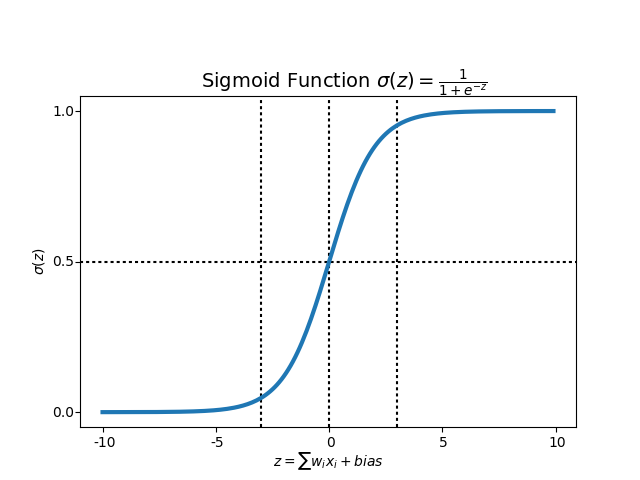

출처 : https://snowdeer.github.io/machine-learning/2018/01/04/activation-function/

> ### 로지스틱 회귀로 다중분류 수행하기
> * LogisticRegression 클래스는 기본적으로 **반복적인 알고리즘**을 사용한다. max_iter 매개변수에서 반복횟수를 지정하며 기본값은 100인데, 본 모델에서는 충분히 훈련시키기 위해 1,000으로 늘려 학습하였다. 
> * LogisticRegression 클래스는 릿지회귀와 같이 계수의 제곱을 **규제**한다. 규제를 제어하는 **매개변수는 C**로서, 값이 작을수록 규제가 커진다. 본 모델에서는 규제완화를 위해 20으로 늘려 적용하였다. 

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [21]:
# 처음 5개 샘플에 대한 예측
print(lr.predict(test_scaled[:5]))



['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [23]:
# 클래스 정보 확인
print(lr.classes_)

# 처음 5개 샘플에 대한 예측확률 확인
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


> 확률 계산을 위한 함수
> * 이진 분류에서는 시그모이드 함수를 사용해 확률값으로 변환
> * 다중 분류에서는 **소프트 맥스** 함수를 사용하여 각 클래스의 값을 확률로 변환
>
> $$ s_{i} = \frac {e^{zi}}{e^{z1} + e^{z2} + e^{z3} + e^{z4} + e^{z5} + e^{z6} + e^{z7}}$$
>


4-2. 확률적 경사 하강법
==============================
> 매일 새로운 생선에 대한 데이터가 추가되는 상황에서 럭키백 속의 생선의 확률을 예측해야 한다면, 어떤 방법을 활용해야 할까? 
> * 새로운 데이터를 활용해 매일 모델을 새로 훈련하면 결국 데이터의 양을 감당하지 못하게 되는 상황이 온다 
> * 이전 데이터를 버리면서 훈련 데이터의 크기를 일정하게 유지하면, 이전 데이터의 중요한 데이터가 삭제될 수 있다 
> * 따라서 앞서 훈련한 모델을 버리지 않고 새로운 데이터에 대해서만 조금씩 훈련을 추가하는 것을 **점진적 학습**이라고 한다
> * 대표적인 점진적 학습 알고리즘은 **확률적 경사 하강법(Stochastic Gradient Descent)**이 있다

> ### 손실함수 (loss function)
> * 머신러닝 알고리즘에서 예측값과 타깃값 사이의 오차를 측정해주는 함수 

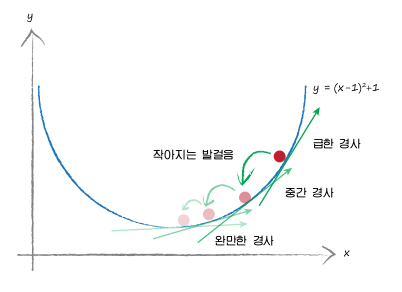

> 손실함수로서 정확도를 사용할수 있을까?  
> 4개의 샘플만 있는 상황에서 가능한 정확도는 0, 0.25, 0.5, 0.75, 1 다섯가지 뿐이다 

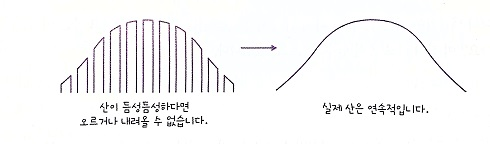

> **로지스틱 손실함수** : 이진 분류를 위한 손실함수  
> **크로스엔트로피 손실함수** : 다중 분류를 위한 손실함수


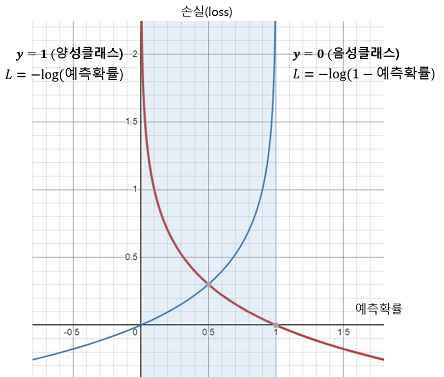

> **확률적 경사 하강법** (Stochastic Gradient Descent) : 하나의 샘플을 훈련 세트에서 랜덤하게 골라 가장 큰 기울기를 따라 하강하는 모델
>
> **미니배치 경사 하강법** (Mini-batch Gradient Descent) : 무작위로 몇개의 샘플을 사용해서 가장 큰 기울기을 따라 하강하는 모델
>
> **배치 경사 하강법** (Batch Gradient Descent) : 전체 샘플을 사용해서 가장 큰 기울기를 따라 하강하는 모델

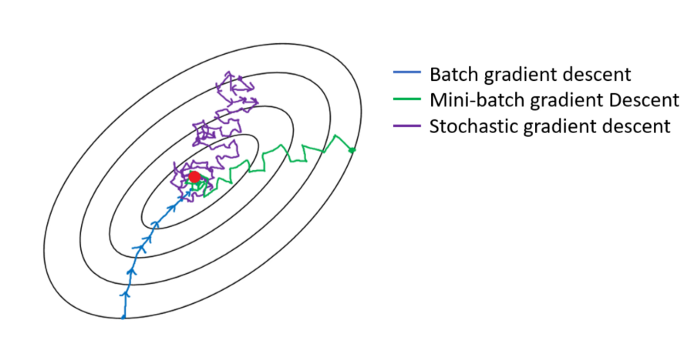

출처 : https://medium.com/analytics-vidhya/gradient-descent-vs-stochastic-gd-vs-mini-batch-sgd-fbd3a2cb4ba4

In [3]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

fish_input = fish[['Weight', 'Length', 'Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [5]:
# 사이킷런의 확률적 경사 하강법을 제공하는 SGDClassifier 사용
from sklearn.linear_model import SGDClassifier

# 객체 생성 시 손실함수는 로지스틱 손실함수, 전체 훈련세트 반복횟수는 10회로 지정
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [7]:
# 점진적인 훈련을 위해 훈련한 sc 모델을 추가로 더 훈련하기
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.7815126050420168
0.8


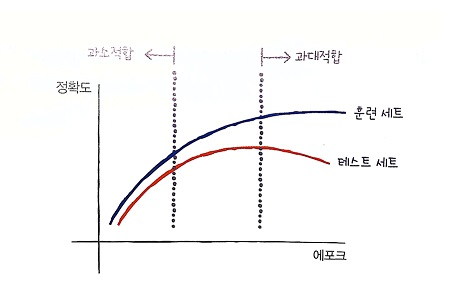

In [9]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
# 훈련세트와 테스트세트에 대한 성능을 저장할 리스트 생성
train_score = []
test_score = []
# fit() 매서드가 아닌, partial_fit() 매서드만 사용하기 위해 훈련세트에 있는 타깃 레이블을 따로 생성
classes = np.unique(train_target)

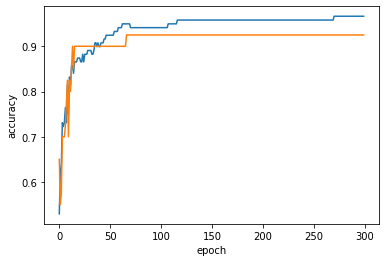

In [10]:
# 훈련을 300번 반복하여 그래프로 확인
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [11]:
# 반복횟수를 100에 맞추고 훈련
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
